<a href='https://www.darshan.ac.in/'> <img src='https://www.darshan.ac.in/Content/media/DU_Logo.svg' width="250" height="300"/></a>
<pre>
<center><b><h1>Machine Learning & Deep Learning</b></center>

<center><b><h1>Lab - 5</b></center>    
<pre>    

# SVR

# Importing the libraries

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read World bank CSV

In [4]:
data = pd.read_csv('WorldBank.csv')

In [6]:
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,India,IND,Export value index (2000 = 100),TX.VAL.MRCH.XD.WD,NaN,NaN,NaN,NaN,NaN,NaN,...,714.748450,700.408454,742.928128,761.441742,632.269428,624.224980,706.102795,766.360840,NaN,NaN
1,India,IND,Insurance and financial services (% of commerc...,TX.VAL.INSF.ZS.WT,NaN,NaN,NaN,NaN,NaN,NaN,...,6.403614,5.246771,5.729495,5.060904,4.706801,4.471147,3.760466,3.921611,3.438072,NaN
2,India,IND,"Merchandise imports by the reporting economy, ...",TM.VAL.MRCH.RS.ZS,4.983551,6.48805,10.124611,9.451370,10.529480,10.891125,...,0.755066,0.273842,0.440954,1.514439,2.228351,2.270593,1.770314,0.535419,NaN,NaN
3,India,IND,Food imports (% of merchandise imports),TM.VAL.FOOD.ZS.UN,NaN,NaN,17.080013,15.197912,16.863038,22.008132,...,3.741041,4.048246,3.895215,4.458509,5.758038,6.505293,6.137617,4.156488,4.248261,NaN
4,India,IND,Share of tariff lines with international peaks...,TM.TAX.MRCH.IP.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,8.434346,8.641136,8.576307,NaN,5.802677,7.707811,8.288774,9.111423,NaN,NaN


<h2># Perform conditional selection to find - Population ages 15-64 (% of total population) </h2>

In [63]:
row = data[data['Indicator Name'] == "Population ages 15-64 (% of total population)"]

In [75]:
row

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
9,India,IND,Population ages 15-64 (% of total population),SP.POP.1564.TO.ZS,56.49748,56.177532,55.807455,55.461664,55.248939,55.211351,...,64.429404,64.805519,65.208489,65.59598,65.944164,66.274262,66.538187,66.766743,67.003811,NaN


In [65]:
# Divide the data into input and output

In [94]:
X = np.arange(1960 , 2020).reshape(-1,1)

In [96]:
y = row.values[0][4:-1:].reshape(-1,1)

In [98]:
X

array([[1960],
       [1961],
       [1962],
       [1963],
       [1964],
       [1965],
       [1966],
       [1967],
       [1968],
       [1969],
       [1970],
       [1971],
       [1972],
       [1973],
       [1974],
       [1975],
       [1976],
       [1977],
       [1978],
       [1979],
       [1980],
       [1981],
       [1982],
       [1983],
       [1984],
       [1985],
       [1986],
       [1987],
       [1988],
       [1989],
       [1990],
       [1991],
       [1992],
       [1993],
       [1994],
       [1995],
       [1996],
       [1997],
       [1998],
       [1999],
       [2000],
       [2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012],
       [2013],
       [2014],
       [2015],
       [2016],
       [2017],
       [2018],
       [2019]])

In [100]:
y

array([[56.49748004],
       [56.17753236],
       [55.80745463],
       [55.46166361],
       [55.24893881],
       [55.21135053],
       [55.09090078],
       [55.15534672],
       [55.34507283],
       [55.57014408],
       [55.78194745],
       [55.85676846],
       [55.95268174],
       [56.07247186],
       [56.23447551],
       [56.44405309],
       [56.49722595],
       [56.62068516],
       [56.78900152],
       [56.9691436],
       [57.1425581],
       [57.18105454],
       [57.22630775],
       [57.28875038],
       [57.39054366],
       [57.54142108],
       [57.55350984],
       [57.6545119],
       [57.81875323],
       [58.01501187],
       [58.22990246],
       [58.37403848],
       [58.5472698],
       [58.75605047],
       [59.012126],
       [59.31657719],
       [59.56507329],
       [59.8572303],
       [60.18600058],
       [60.53971518],
       [60.90862046],
       [61.18898716],
       [61.4993847],
       [61.83084479],
       [62.173897],
       [62.52276485]

# Plot scatter plot of Population ages 15-64 (% of total population)

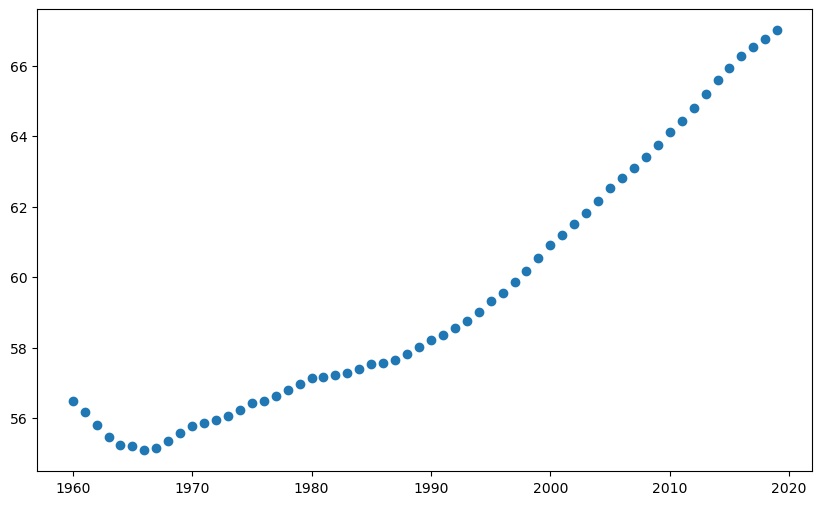

In [103]:
plt.figure(figsize=(10,6))
plt.scatter(X, y)

# Feature Scaling (Mandatory for SVR)**
SVR is highly sensitive to the range of data points. If we don't scale (normalize) the data, the model will fail to find the correct hyperplane.

In [150]:
from sklearn.preprocessing import StandardScaler

In [152]:
X_scaler = StandardScaler()
Y_scaler = StandardScaler()

In [154]:
x_scale = X_scaler.fit_transform(X)

In [156]:
y_scale = Y_scaler.fit_transform(y)

# Splitting the dataset into the Training set and Test set

# Fitting SVR on 3 Different Kernel on dataset

In [170]:
from sklearn.svm import SVR

In [238]:
svr = SVR(kernel='linear')
svr2 = SVR()
svr3 = SVR(kernel='poly' , degree=5)
model = svr.fit(x_scale , y_scale.ravel())
model2 = svr2.fit(x_scale , y_scale.ravel())
model3 = svr3.fit(x_scale , y_scale.ravel())

In [221]:
y_predicted = Y_scaler.inverse_transform(model.predict(x_scale).reshape(-1,1))

In [223]:
y_predicted2 = Y_scaler.inverse_transform(model2.predict(x_scale).reshape(-1,1))

In [240]:
y_predicted3 = Y_scaler.inverse_transform(model3.predict(x_scale).reshape(-1,1))

In [215]:
y_predicted

array([[53.38449391],
       [53.58580857],
       [53.78712322],
       [53.98843788],
       [54.18975254],
       [54.3910672 ],
       [54.59238185],
       [54.79369651],
       [54.99501117],
       [55.19632582],
       [55.39764048],
       [55.59895514],
       [55.80026979],
       [56.00158445],
       [56.20289911],
       [56.40421377],
       [56.60552842],
       [56.80684308],
       [57.00815774],
       [57.20947239],
       [57.41078705],
       [57.61210171],
       [57.81341636],
       [58.01473102],
       [58.21604568],
       [58.41736034],
       [58.61867499],
       [58.81998965],
       [59.02130431],
       [59.22261896],
       [59.42393362],
       [59.62524828],
       [59.82656293],
       [60.02787759],
       [60.22919225],
       [60.43050691],
       [60.63182156],
       [60.83313622],
       [61.03445088],
       [61.23576553],
       [61.43708019],
       [61.63839485],
       [61.8397095 ],
       [62.04102416],
       [62.24233882],
       [62

In [228]:
y_predicted2

array([[56.13497486],
       [55.97146235],
       [55.82856335],
       [55.70825423],
       [55.61207123],
       [55.54106602],
       [55.49577833],
       [55.47622738],
       [55.48192233],
       [55.51189157],
       [55.56472938],
       [55.63865776],
       [55.7316006 ],
       [55.84126667],
       [55.96523773],
       [56.10105775],
       [56.24631967],
       [56.39874602],
       [56.55626058],
       [56.71704881],
       [56.87960529],
       [57.04276742],
       [57.20573529],
       [57.36807809],
       [57.52972826],
       [57.69096464],
       [57.85238642],
       [58.0148795 ],
       [58.17957688],
       [58.34781459],
       [58.52108419],
       [58.70098278],
       [58.88916094],
       [59.08726899],
       [59.29690152],
       [59.51954053],
       [59.75649707],
       [60.008852  ],
       [60.27739654],
       [60.56257384],
       [60.86442313],
       [61.18252866],
       [61.51597595],
       [61.86331804],
       [62.22255466],
       [62

In [242]:
y_predicted3

array([[49.14252237],
       [50.68935226],
       [52.03366852],
       [53.19604086],
       [54.19559643],
       [55.05007225],
       [55.7758677 ],
       [56.38809697],
       [56.9006415 ],
       [57.32620244],
       [57.67635312],
       [57.96159151],
       [58.19139266],
       [58.37426116],
       [58.51778361],
       [58.62868108],
       [58.71286152],
       [58.77547228],
       [58.82095255],
       [58.85308579],
       [58.8750522 ],
       [58.88948118],
       [58.89850382],
       [58.90380529],
       [58.90667734],
       [58.90807075],
       [58.90864781],
       [58.90883471],
       [58.90887408],
       [58.90887739],
       [58.90887742],
       [58.90888072],
       [58.90892009],
       [58.909107  ],
       [58.90968405],
       [58.91107747],
       [58.91394952],
       [58.91925098],
       [58.92827362],
       [58.94270261],
       [58.96466902],
       [58.99680225],
       [59.04228252],
       [59.10489329],
       [59.18907373],
       [59

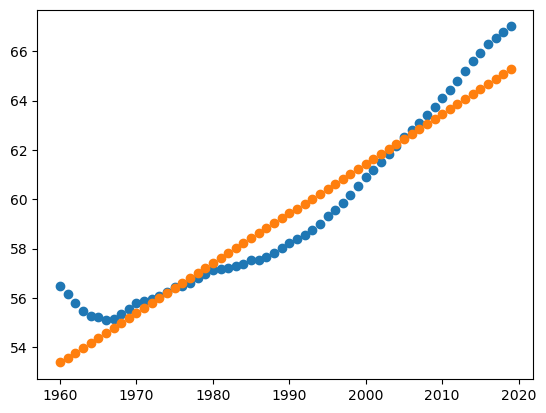

In [197]:
plt.scatter(X,y)
plt.scatter(X,y_predicted)

# Predict the x_test using 3 Kernel

In [ ]:
model_rbf.score(x_train,y_train)

0.9947138713539011

In [ ]:
model_rbf.score(x_test,y_test)

0.9880623181593732

array([57.55350984, 59.31657719, 67.00381119, 57.81875323, 55.85676846,
       55.80745463, 59.012126, 66.7667425, 60.90862046, 57.22630775,
       55.24893881, 55.78194745, 58.22990246, 61.18898716, 58.75605047,
       61.83084479, 63.74196691, 55.15534672], dtype=object)

array([57.73445326, 59.30206118, 64.8451716 , 57.99812952, 55.96479236,
       56.12587167, 59.06485884, 64.91876466, 60.76906052, 57.24445561,
       55.93360816, 55.89821768, 58.29641078, 61.1088798 , 58.84682535,
       61.81299688, 63.81278461, 55.81527994])

# Visualising the  results

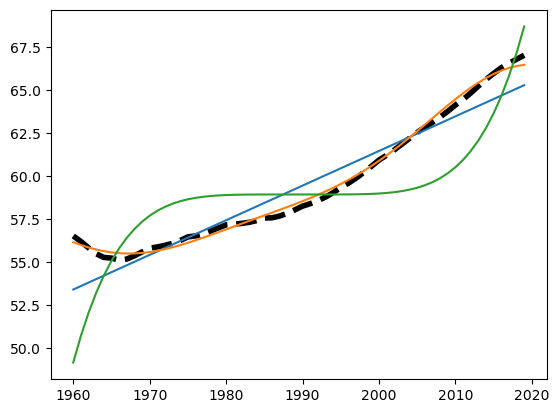

In [284]:
plt.plot(X,y , linestyle = 'dashed' , color = 'k' , linewidth = '4.0' )
plt.plot(X,y_predicted )
plt.plot(X,y_predicted2)
plt.plot(X,y_predicted3)
plt.show()

### **Student Activity : Prediction**
**Task:** Predict the value for the Year **2025** (or value 6.5 in the demo data). 
Remember: You must transform the input before predicting, and inverse transform the output.

In [300]:
new_data = [[2025]]
predicted = model.predict(X_scaler.transform(new_data))

In [320]:
print(f"{Y_scaler.inverse_transform(predicted.reshape(-1,1))[0][0]} %")

66.4699466150328 %
